# Deep Learning Software Packages

- ## TensorFlow (https://www.tensorflow.org/ ) 
> - ## Originally from Google
> - ## probably the most commonly used neural net package today
> - ## Official API's in Python and C++
> - ## Third Party wrapper API's in many different languages, including R through Keras



- ## CNTK (Microsoft Cognitive Neural Tool Kit, https://www.microsoft.com/en-us/cognitive-toolkit/)
>> - ## Primarily Python library
>> - ## Can be run as a stand-alone program via ``Brainscript'' scripting language 
>>> - ### https://docs.microsoft.com/en-us/cognitive-toolkit/brainscript-basic-concepts 


- ## Keras (https://keras.io/)
> - ## A neural network library for Python
> - ## Includes wrappers for other types of system such as tensorflow and cntk
> - ## Easy to install in R (there is a package called keras)

In [189]:
install.packages("keras")

Installing package into ‘/home/mathman/R/x86_64-pc-linux-gnu-library/3.4’
(as ‘lib’ is unspecified)


In [31]:
library(keras)

The Keras documentation says that the following will install Keras and TensorFlow to run on your CPU. It also says that there are additional installations if you want to take advantage of GPU, but that they are not loaded in the following command, but can be loaded

In [191]:
install_keras()

Using existing virtualenv at  ~/.virtualenvs/r-tensorflow 
Upgrading pip ...
Upgrading wheel ...
Upgrading setuptools ...
Installing TensorFlow ...

Installation complete.



On Linux, the first time I did this, it told me that I had to install some additional software and gave me the following error message. Presumably it will tell you where to go to get the needed software on other OS's.

<code>
Error: Prerequisites for installing TensorFlow not available.<br>
Execute the following at a terminal to install the prerequisites:<br>
$ sudo apt-get install python-pip python-virtualenv
</code>

# MNIST Data Set
### Modified National Institute of Standards and Technology

## A database of handwritten letters 
### available at http://yann.lecun.com/exdb/mnist/
- > ### 60,000 Training images
- > ### 10,000 Testing images

<img src="pix/some-letters-crop.png">

#### We will vist how to produce this image (shown above) from the data set at the bottom of this notebook

In [1]:
library(keras)

In [2]:
MNIST=dataset_mnist()

ERROR: Error: ImportError: cannot import name abs

Detailed traceback: 
  File "/home/mathman/.virtualenvs/r-tensorflow/lib/python2.7/site-packages/keras/__init__.py", line 3, in <module>
    from . import utils
  File "/home/mathman/.virtualenvs/r-tensorflow/lib/python2.7/site-packages/keras/utils/__init__.py", line 6, in <module>
    from . import conv_utils
  File "/home/mathman/.virtualenvs/r-tensorflow/lib/python2.7/site-packages/keras/utils/conv_utils.py", line 9, in <module>
    from .. import backend as K
  File "/home/mathman/.virtualenvs/r-tensorflow/lib/python2.7/site-packages/keras/backend/__init__.py", line 89, in <module>
    from .tensorflow_backend import *
  File "/home/mathman/.virtualenvs/r-tensorflow/lib/python2.7/site-packages/keras/backend/tensorflow_backend.py", line 5, in <module>
    import tensorflow as tf
  File "/home/mathman/.virtualenvs/r-tensorflow/lib/python2.7/site-packages/tensorflow/__init__.py", line 22, in <module>
    from tensorflow.python import pywrap_tensorflow  # pylint: disable=unused-import
  File "/home/mathman/.virtualenvs/r-tensorflow/lib/python2.7/site-packages/tensorflow/python/__init__.py", line 81, in <module>
    from tensorflow.python import keras
  File "/home/mathman/.virtualenvs/r-tensorflow/lib/python2.7/site-packages/tensorflow/python/keras/__init__.py", line 24, in <module>
    from tensorflow.python.keras import activations
  File "/home/mathman/.virtualenvs/r-tensorflow/lib/python2.7/site-packages/tensorflow/python/keras/activations/__init__.py", line 22, in <module>
    from tensorflow.python.keras._impl.keras.activations import elu
  File "/home/mathman/.virtualenvs/r-tensorflow/lib/python2.7/site-packages/tensorflow/python/keras/_impl/keras/__init__.py", line 21, in <module>
    from tensorflow.python.keras._impl.keras import activations
  File "/home/mathman/.virtualenvs/r-tensorflow/lib/python2.7/site-packages/tensorflow/python/keras/_impl/keras/activations.py", line 23, in <module>
    from tensorflow.python.keras._impl.keras import backend as K
  File "/home/mathman/.virtualenvs/r-tensorflow/lib/python2.7/site-packages/tensorflow/python/keras/_impl/keras/backend.py", line 38, in <module>
    from tensorflow.python.layers import base as tf_base_layers
  File "/home/mathman/.virtualenvs/r-tensorflow/lib/python2.7/site-packages/tensorflow/python/layers/base.py", line 25, in <module>
    from tensorflow.python.keras.engine import base_layer
  File "/home/mathman/.virtualenvs/r-tensorflow/lib/python2.7/site-packages/tensorflow/python/keras/engine/__init__.py", line 21, in <module>
    from tensorflow.python.keras.engine.base_layer import InputSpec
  File "/home/mathman/.virtualenvs/r-tensorflow/lib/python2.7/site-packages/tensorflow/python/keras/engine/base_layer.py", line 33, in <module>
    from tensorflow.python.keras import backend
  File "/home/mathman/.virtualenvs/r-tensorflow/lib/python2.7/site-packages/tensorflow/python/keras/backend/__init__.py", line 22, in <module>
    from tensorflow.python.keras._impl.keras.backend import abs



In [33]:
summary(MNIST)

      Length Class  Mode
train 2      -none- list
test  2      -none- list

In [34]:
summary(MNIST$train)

  Length   Class  Mode   
x 47040000 -none- numeric
y    60000 -none- numeric

In [5]:
summary(MNIST$train$x)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    0.00    0.00   33.32    0.00  255.00 

In [6]:
summary(MNIST$train$y)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   2.000   4.000   4.454   7.000   9.000 

## Processing the x-data

Processing the raw data from the library (data description at http://yann.lecun.com/exdb/mnist/ and also in https://cran.r-project.org/web/packages/keras/vignettes/getting_started.html )
- The x data in the raw data file is give as a 3-d array (images,width,height) of grayscale values . 
- Each image must be reshaped into a single dimension for training.
- The 28x28 images are flattened in length 784 vectors
- The grayscales are given in a range 0-255, we converge to 0-1. 
- Each image will be represented by a length 784 column vector

In [7]:
dim(MNIST$train$x) # original data has 3 dimensions

[1] 60000    28    28

In [8]:
dim(MNIST$test$x)

[1] 10000    28    28

convert the dataset so that each column represents one 28x28 images and scale the data

In [35]:
n=60000
x.train = array_reshape(MNIST$train$x, c(n, 784))/255

In [36]:
ntest=10000
x.test = array_reshape(MNIST$test$x, c(ntest,784))/255

In [11]:
dim(x.train)

[1] 60000   784

In [12]:
dim(x.test)

[1] 10000   784

The test and training data have now been converted to column vectors

## Processing the y- data

- ### The y data is stored as a lists of numbers from 0 through 9
- ### each label tells us what the corresponding image represents
- ### we will convert these data to categories


In [13]:
head(MNIST$train$y,25)

[1] 5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1

In [14]:
dim(MNIST$train$y)

[1] 60000

In [15]:
y.train = to_categorical(MNIST$train$y,10)
y.test = to_categorical(MNIST$test$y,10)

In [16]:
head(y.train,5)

0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0
0,0,0,0,1,0,0,0,0,0
0,1,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,1


The format of the y encoding is called a "one hot encoding." This type of encoding is widely used in machine learning to represent categories. The advantage of this encoding are that:
<ul>
    <li>The encodings of any two differnt classes, such as the encode for digit 5 and digit 9, are orthogonal vectors.
     <li> The encodings are all the same magnitude vector, that is, the y have length 1. 
    </ul>
This means we have clusters in 10-dimensional space but the clusters are all equidistant from the original and none is biased based on its distance from the origin.    


## Building a Keras Model

- ### A model must consist of a linear stack of layers
- ### You can always print a summary of the model with <kbd>summary(model)</kbd>
- ### (Only) the first layer must be told about the SHAPE of the input, e.g, the number of inputs

The model is built by adding a sequence of neural network layers. The first layer has 784 input nodes, and the output vector as 10 units. There are intermediate layers of 256 and 128 units

In [17]:
model = keras_model_sequential() 
model %>% 
  layer_dense(units = 256, activation = 'relu', 
              input_shape = c(784)) %>% 
  layer_dropout(rate = 0.4) %>% 
  layer_dense(units = 128, activation = 'relu') %>%
  layer_dropout(rate = 0.3) %>%
  layer_dense(units = 10, activation = 'softmax')

<kbd>keras_model_sequential()</kbd> computes the output of each neuron as the dot product of the input and activation functoin, plus any bias

<kbd>relu</kbd> is a rectified linear activation function. It returns $\alpha x$ if $x>0$ and zero otherwise, where $\alpha$ is the slope. 

<kbd>softmax</kbd> is a generalized logistic function that is used when there are multiple inputs and multiple outputs. If performs the function of the $\sigma()$ function in an, e.g., backprop net.

<kbd> layer_dense()</kbd> adds a densely connected layer

<kbd>layer_droput()</kbd> selects how many units to actually units (e.g., rate=0.3) to proven over fitting, so the other units are not used during training.

In [ ]:
summary(model)

## Compile the model using the Keras compiler

### Requirements for compilation
1. ### An Optimizer - this is the function that solves for the unknown parameters
2. ### A loss function. 
<ul>
    <li>The optimizer will try to minimze the loss function. 
    <li> For example, suppose your target is (0,0,1,0,0,....0) and the predicted probabilites are a vector of floating point numbers that add up to one such as (0.05, 0.1, 0.65, 0.05, ...) The error in predicted probability can be estimated with a loss function.
     <li>
For a multi-class classification problem such as this, a common one to use is called categorical crossentropy. The categorical crossentropy function between two states $p$ and $q$ is 
$$H(p,q) = -\sum_x p(x) \log q(x)$$
where the $x$ values are the elements of the two vectors.
</ul>
3. ### A metric
The difference between a metric and a loss function is this:
<ul>
<li> the output of a loss function is used to train the model
<li>the output of a metric is use to evaluate the model, but not to train the model
</ul>

Several examples are given at https://cran.r-project.org/web/packages/keras/vignettes/sequential_model.html

In [18]:
# model %>% 
compile(model,
  loss = 'categorical_crossentropy',
  optimizer = optimizer_rmsprop(),
  metrics = c('accuracy')
)

Loss functions are described at https://keras.io/losses

Optimizers are documentated at https://keras.io/optimizers/

The documentation on <kbd>RMS_prop</kbd> says that it is usually a good choice for recurrent neural networks. RMSprop is a gradient descent optimizer with an exponentially decaying average of square gradients. (see http://ruder.io/optimizing-gradient-descent/index.html#rmsprop ) Looking at a number of discussion boards online, RMSprop seems to be a very popular choice, particularly among online courses. Perhaps exposure to these course has made it popular. There are many other and similar algorithms and there is no clear logic for choosing one over another in many cases. However, some optimizers are bad for certain problems, so it is a good idea to do some research and figure out if you are using a bad optimizer.

<kbd>metrics</kbd> are used to judge the accuracy of the model.

There is a catalog of metrics at https://keras.io/metrics/

Using the <kbd>accuracy</kbd> value allows keras to pick the appropriate accuracy function. For a categorical clasification problem, it will chose <kbd>categorical_accuracy</kbd>, which counts a categorization as correct if the item was placed in the correct category, and incorrect otherwise

## Train the model over 30 iterations using batches of 128 images at a time

### this may take a while ....

history = model %>% fit(
  x.train, y.train, 
  epochs = 30, batch_size = 128, 
  validation_split = 0.2
)

In [19]:
results=fit(model,  x.train, y.train, 
  epochs = 30, batch_size = 128, 
  validation_split = 0.2)

In [20]:
summary(results)

        Length Class  Mode
params  8      -none- list
metrics 4      -none- list

In [21]:
results$params

$metrics
[1] "loss"     "acc"      "val_loss" "val_acc" 

$epochs
[1] 30

$steps
NULL

$do_validation
[1] TRUE

$samples
[1] 48000

$batch_size
[1] 128

$verbose
[1] 1

$validation_samples
[1] 12000

In [28]:
options(width=50)
results$metrics

$acc
 [1] 0.8707917 0.9408125 0.9542292 0.9621250
 [5] 0.9650417 0.9679375 0.9720417 0.9733958
 [9] 0.9749792 0.9766042 0.9770625 0.9780417
[13] 0.9792500 0.9805000 0.9819583 0.9805625
[17] 0.9824583 0.9829375 0.9832292 0.9833958
[21] 0.9837083 0.9851458 0.9846667 0.9853958
[25] 0.9847917 0.9846875 0.9863125 0.9863333
[29] 0.9856042 0.9857917

$loss
 [1] 0.42764393 0.19858395 0.15414186 0.12983266
 [5] 0.11633017 0.10582877 0.09548351 0.09105394
 [9] 0.08473233 0.08181707 0.07665998 0.07770393
[13] 0.07164781 0.06937717 0.06459344 0.06658251
[17] 0.06362034 0.05908025 0.05907767 0.06003036
[21] 0.05866561 0.05429553 0.05403805 0.05309454
[25] 0.05348717 0.05533993 0.05154462 0.05439298
[29] 0.05371546 0.05329652

$val_acc
 [1] 0.9535000 0.9651667 0.9701667 0.9706667
 [5] 0.9751667 0.9739167 0.9765833 0.9779167
 [9] 0.9771667 0.9774167 0.9767500 0.9795833
[13] 0.9772500 0.9787500 0.9780000 0.9787500
[17] 0.9801667 0.9789167 0.9800833 0.9802500
[21] 0.9790833 0.9795000 0.9794167 0.9805833
[25] 0.9810833 0.9802500 0.9811667 0.9790833
[29] 0.9798333 0.9809167

$val_loss
 [1] 0.16048971 0.12325707 0.10518625 0.09836761
 [5] 0.09047158 0.09385841 0.08869328 0.08719868
 [9] 0.08904928 0.09076067 0.09590862 0.08970497
[13] 0.09460407 0.09075906 0.09808927 0.09368589
[17] 0.09658710 0.09819715 0.10124061 0.09530808
[21] 0.09736221 0.09887086 0.10288081 0.10393032
[25] 0.10097290 0.10281031 0.10340745 0.10757599
[29] 0.10758338 0.10602827

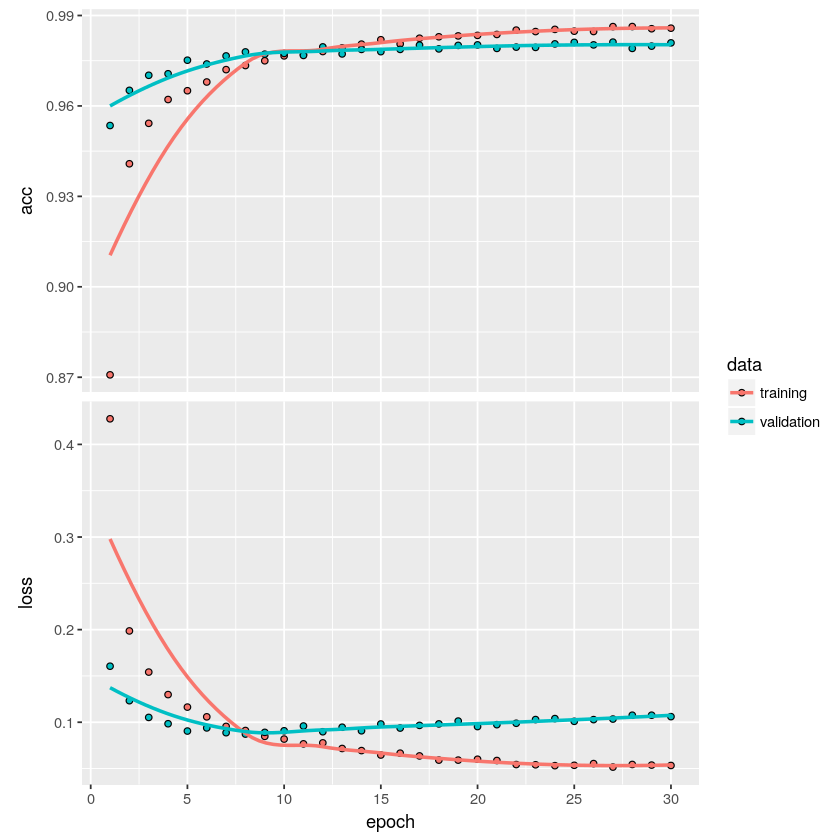

In [30]:
#pdf("MNIST-keras-results.pdf")
plot(results)
#dev.off()

## Evaluate against the test data

In [24]:
 evaluate(model, x.test, y.test)

$loss
[1] 0.1006393

$acc
[1] 0.982

For each of the first 10 images in the test data set, predict what that image represents. 

In [25]:
head(predict_classes(model, x.test),10)

[1] 7 2 1 0 4 1 4 9 6 9

## Plot the first 10 images in the test data set

In [ ]:
library(graphics)

In [ ]:
options(repr.plot.width=10, repr.plot.height=4)

plot(c(0,280), c(0,30), type="n",xlab="",ylab=" ",axes=FALSE)
for (i in 1:10){
    im = 1-x.test[i,]
    dim(im)=c(28,28)
    im = t(im)
    left = (i-1)*28
    rasterImage(im,xleft=left, ybottom=0,xright=left+28, ytop=28)
    }

In [39]:
#pdf("some-letters.pdf",height="6",width="6")
plotrows=function(data, nstart, nstop){

    n=nstop-nstart+1
    nrows=(n %/% 10) + 1
    width = 10*28
    height = nrows*28
    plot(c(0,width), c(0,height), type="n",xlab="",ylab=" ",axes=FALSE)

    options(repr.plot.width=width/28, repr.plot.height=height/14)
    for (j in nstart:nstop){
     
        the.row = (j-1) %/% 10 
        bottom = 28*the.row
        the.column = (j-1) %% 10 
        left = 28*the.column
        im = 1-data[j,]
        dim(im)=c(28,28)
        im = t(im)
        rasterImage(im,xleft=left, 
                    ybottom=bottom,
                    xright=left+28, 
                    ytop=bottom+28)
        
    }

}

#dev.off()

In [ ]:
5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1


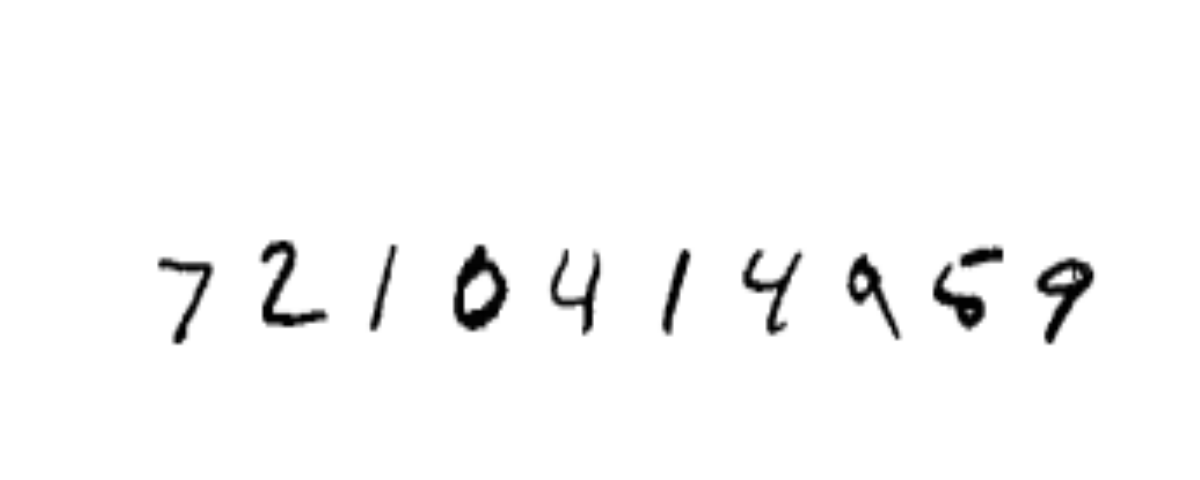

In [40]:
plotrows(x.test, 1, 10)

In [41]:
pdf("first-row-MNIST-test.pdf")
plotrows(x.test,1,10)
dev.off()

png 
  2

In [ ]:
7 2 1 0 4 1 4 9 6 9
